In [1]:
import scanpy as sc
import pandas as pd
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
#NEED TO ACTUALLY DO PREPROCESSING NOW.

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.9 pynndescent==0.5.5


In [2]:
l = sc.read_mtx("chimp_cell_counts_consensus.mtx")

In [3]:
p = pd.read_csv("metadata_chimp_cells.tsv", sep = "\t")
g = pd.read_csv("genes_consensus.txt", sep = "\t", header = None)
l.var = p
l.obs = g

In [4]:
l.obs.index = l.obs[1]

In [5]:
l = l.transpose()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [6]:
l.var[1] = l.var[1].astype(str)
l.var.columns = ["ENS", "Gene"]
l.var.index = l.var["Gene"]
l.var.index

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.4', 'AL732372.1', 'OR4F29', 'AC114498.1',
       ...
       'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4',
       'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object', name='Gene', length=32856)

In [7]:
l.var_names_make_unique()

In [8]:
hum_counts = sc.read_mtx("human_cell_counts_consensus.mtx")

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


normalizing counts per cell
    finished (0:00:00)


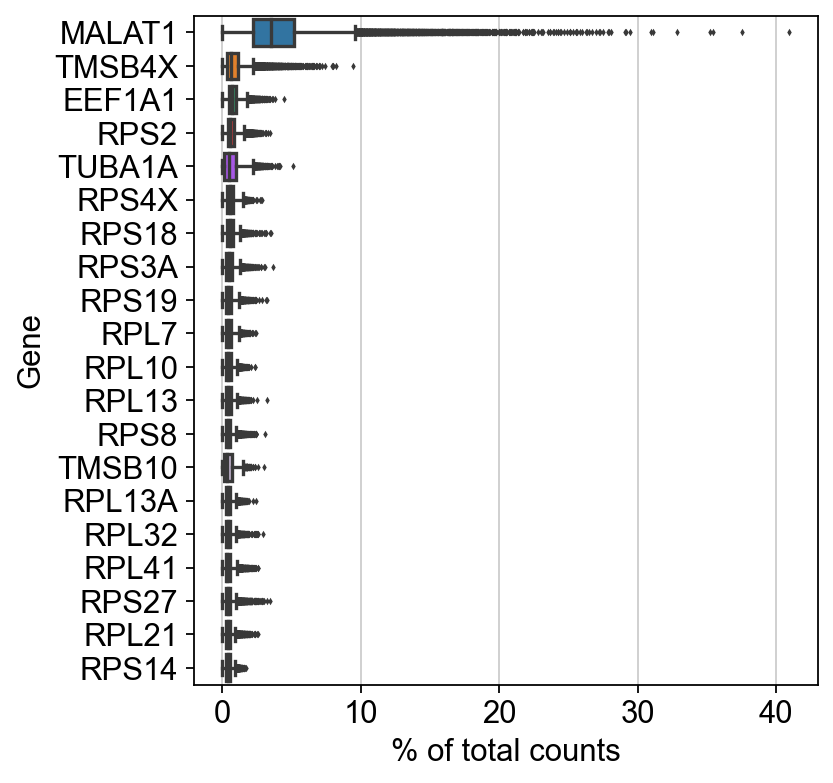

In [9]:
p = pd.read_csv("metadata_human_cells.tsv", sep = "\t")
g = pd.read_csv("genes_consensus.txt", sep = "\t", header = None)
hum_counts.var = p
hum_counts.obs = g
hum_counts.obs.index = hum_counts.obs[1]
hum_counts = hum_counts.transpose()
sc.pl.highest_expr_genes(l, n_top=20, )

In [10]:
hum_counts.var[1] = hum_counts.var[1].astype(str)
hum_counts.var.columns = ["ENS", "Gene"]
hum_counts.var.index = hum_counts.var["Gene"]
hum_counts.var_names_make_unique()

... storing 'Species' as categorical
... storing 'Stage' as categorical
... storing 'Line' as categorical
... storing 'Sample' as categorical
... storing 'Barcode' as categorical
... storing 'PredCellType' as categorical
... storing 'cl_FullLineage' as categorical
... storing 'cl_LineComp' as categorical
... storing 'Gene' as categorical


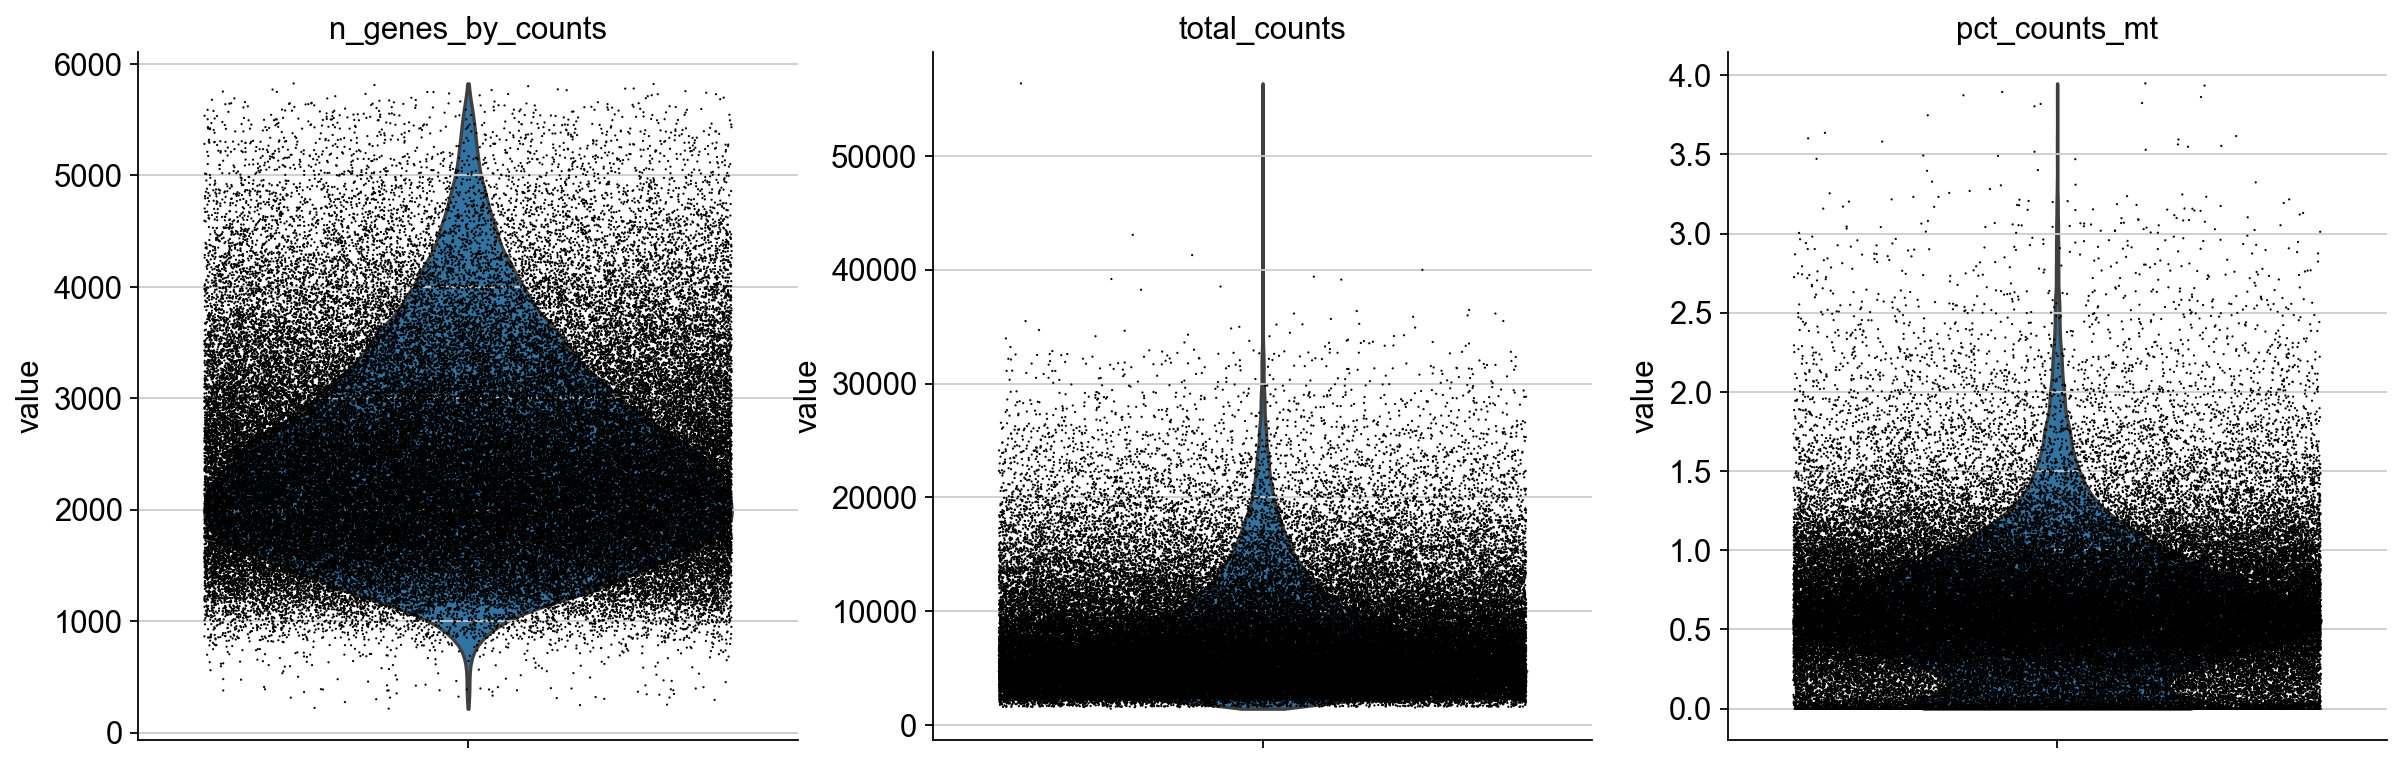

Trying to set attribute `.obs` of view, copying.


filtered out 9214 genes that are detected in less than 3 cells


Trying to set attribute `.obs` of view, copying.


filtered out 10040 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.ob

In [11]:
hum_counts.var['mt'] = hum_counts.var_names.str.contains('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(hum_counts, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
l.var['mt'] = l.var_names.str.contains('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(l, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(hum_counts, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
hum_counts = hum_counts[hum_counts.obs.n_genes_by_counts < 2500, :]
hum_counts = hum_counts[hum_counts.obs.pct_counts_mt < 5, :]
l = l[l.obs.n_genes_by_counts < 2500, :]
l = l[l.obs.pct_counts_mt < 5, :]
sc.pp.filter_cells(hum_counts, min_genes=200)
sc.pp.filter_genes(hum_counts, min_cells=3)
sc.pp.filter_cells(l, min_genes=200)
sc.pp.filter_genes(l, min_cells=3)
sc.pp.normalize_total(hum_counts, target_sum=1e6)
sc.pp.normalize_total(l, target_sum=1e6)
sc.pp.log1p(hum_counts)
sc.pp.log1p(l)
sc.pp.highly_variable_genes(hum_counts, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.highly_variable_genes(l, min_mean=0.0125, max_mean=3, min_disp=0.5)
hum_counts.raw = hum_counts
l.raw = l
sc.tl.pca(hum_counts, svd_solver='arpack')
sc.tl.pca(l, svd_solver='arpack')
sc.pp.neighbors(hum_counts, n_neighbors=10, n_pcs=40)
sc.pp.neighbors(l, n_neighbors=10, n_pcs=40)
sc.tl.umap(hum_counts)
sc.tl.umap(l)

In [12]:
set(list(l.obs['cl_FullLineage']))

{'G2M/S NSC',
 'G2M/S dorsal progenitors',
 'NSC/radial glia',
 'cortical neurons 1',
 'cortical neurons 2',
 'deep layer neurons 1',
 'deep layer neurons 2',
 'hindbrain 1',
 'hindbrain 2',
 'intermediate progenitors',
 'mesenchymal-like cells',
 'microglia/off-lineage cells 4',
 nan,
 'neural stem cells 1',
 'neural stem cells 2',
 'off-lineage cells 1',
 'off-lineage cells 2',
 'off-lineage cells 3',
 'radial glia',
 'stem cells 1',
 'stem cells 2',
 'stem cells 3',
 'upper layer neurons 1',
 'upper layer neurons 2',
 'upper layer neurons 3',
 'ventral forebrain progenitors and neurons'}

In [13]:
list(set(hum_counts.obs["cl_FullLineage"]))

[nan,
 'choroid plexus/mesenchymal-like cells',
 'stem cells 1',
 'cycling ventral progenitors',
 'ectodermal/neuroectodermal-like cells',
 'retina progenitors',
 'stem cells 3',
 'cortical neurons 1',
 'gliogenic/outer RGCs and astrocytes',
 'midbrain/hindbrain cells',
 'RGCs early 2',
 'ventral progenitors and neurons 2',
 'neuroepithelial-like cells',
 'RGCs 3',
 'ventral progenitors and neurons 3',
 'stem cells 2',
 'ventral progenitors and neurons 1',
 'cortical neurons 2',
 'cycling dorsal progenitors',
 'RGCs early 1',
 'IPs and early cortical neurons']

In [14]:
chp_EDNRB = l[:, l.var["Gene"].isin(["EDNRB", "EDN1", "PAX6", "SOX2", "VIM", "HES1"])]
hum_EDNRB = hum_counts[:, hum_counts.var["Gene"].isin(["EDNRB", "EDN1", "PAX6", "SOX2", "VIM", "HES1"])]
hum_EDNRB = hum_EDNRB[~hum_EDNRB.obs["Stage"].isin(["iPSCs", "EB", "Neuroectoderm", "Neuroepithelium"])]
chp_EDNRB = chp_EDNRB[~chp_EDNRB.obs["Stage"].isin(["iPSCs", "EB", "Neuroectoderm", "Neuroepithelium"])]

In [15]:
list(set(chp_EDNRB.obs["cl_FullLineage"]))

[nan,
 'radial glia',
 'mesenchymal-like cells',
 'NSC/radial glia',
 'neural stem cells 2',
 'upper layer neurons 3',
 'deep layer neurons 2',
 'off-lineage cells 1',
 'deep layer neurons 1',
 'neural stem cells 1',
 'cortical neurons 1',
 'G2M/S dorsal progenitors',
 'ventral forebrain progenitors and neurons',
 'hindbrain 2',
 'G2M/S NSC',
 'microglia/off-lineage cells 4',
 'upper layer neurons 1',
 'intermediate progenitors',
 'upper layer neurons 2',
 'hindbrain 1',
 'cortical neurons 2',
 'off-lineage cells 3']

In [16]:
d = {}
import numpy as np
for i in list(set(hum_EDNRB.obs["cl_FullLineage"])):
    if i != float("nan"):
        hum_rg = hum_EDNRB[hum_EDNRB.obs["cl_FullLineage"].isin([i])]
        z_hum = pd.DataFrame(hum_rg.X.toarray())
        z_hum.columns = hum_rg.var["Gene"]
        z_hum.index = hum_rg.obs
        c_ednrb_hum_l = []
        tot = 0
        c = 0
        for index, row in z_hum.iterrows():
            tot += 1
            c_ednrb_hum_l.append(row[5])
            if row[5] > 0:
                c += 1
        print(tot, c)
        if c > 100:
            print(i)
        d[i] = c_ednrb_hum_l
out = []
out_cell = []
for key in d.keys():
    out.append([key, np.mean(d[key]), "Human"])
    for i in d[key]:
        out_cell.append([key, i, "Human"])
c_ednrb_hum_l = d["RGCs early 2"]

32655 789
nan
64 28
2 0
272 0
30 0
397 2
1 0
808 1
548 114
gliogenic/outer RGCs and astrocytes
2218 51
383 193
RGCs early 2
1772 2
8 0
1930 158
RGCs 3
4299 28
807 0
801 18
373 28
1234 102
RGCs early 1
1196 5


In [17]:
d = {}
for i in list(set(chp_EDNRB.obs["cl_FullLineage"])):
    chp_rg = chp_EDNRB[chp_EDNRB.obs["cl_FullLineage"].isin([i])]
    z_chp = pd.DataFrame(chp_rg.X.toarray())
    z_chp.columns = chp_rg.var["Gene"]
    z_chp.index = chp_rg.obs
    c_ednrb_chp_l = []
    tot = 0
    c = 0
    for index, row in z_chp.iterrows():
        tot += 1
        c_ednrb_chp_l.append(row[5])
        if row[5] > 0:
            c += 1
    print(tot, c)
    if c > 100:
        print(i)
    d[i] = c_ednrb_chp_l
for key in d.keys():
    out.append([key, np.mean(d[key]), "Chimp"])
    for i in d[key]:
        out_cell.append([key, i, "Chimp"])

10188 70
1464 62
363 9
1873 378
NSC/radial glia
745 39
351 0
150 0
48 0
771 0
1063 97
1439 1
282 3
1956 0
820 1
697 85
97 2
4 0
1114 5
625 0
865 8
2455 2
304 12


Text(0, 0.5, 'Mean expression (log$_{2}$(CPM))')

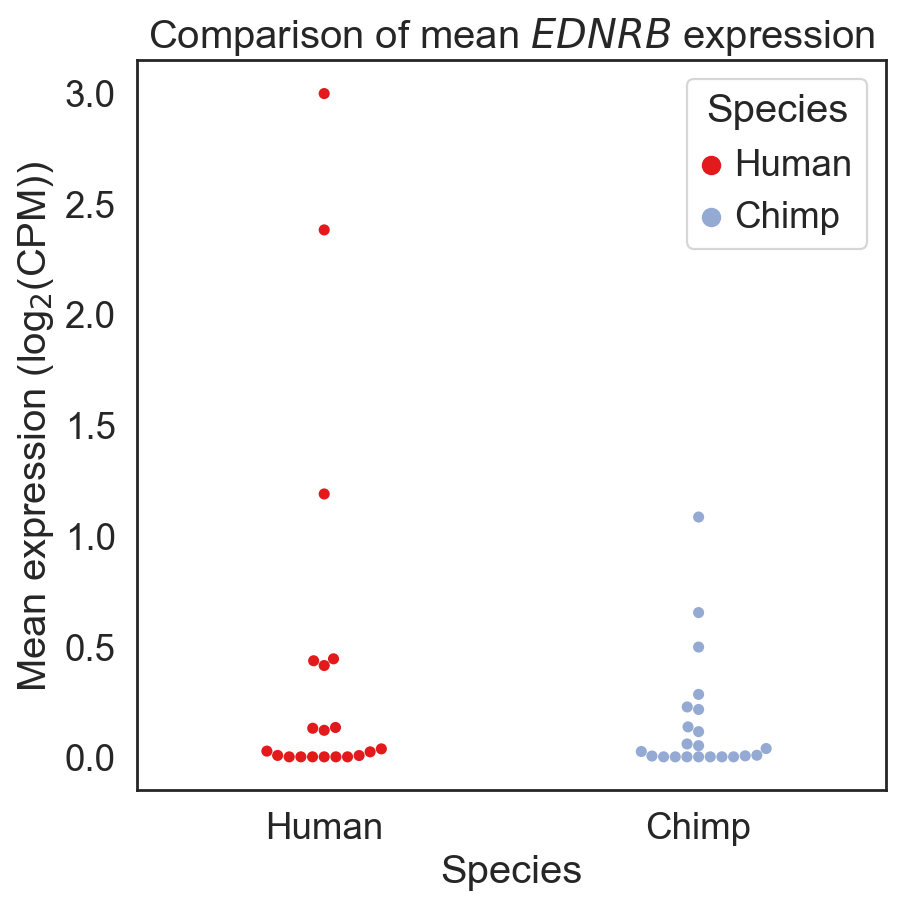

In [24]:
#Swarm plot of mean expression
import matplotlib.pyplot as plt
import seaborn as sns
palette = {"chimp":"#95AAD3",
           "human":"#E31A1C",
          "Chimp":"#95AAD3",
           "Human":"#E31A1C"}
#pvalue < 1e-16 in all cases
fig, ax = plt.subplots(figsize=(6,6))
df = pd.DataFrame(out)
sns.set(font_scale = 1.5)
sns.set_style("white")
df.columns = ["Cell Type", "Mean Expression (log2(CPM))", "Species"]
sns.swarmplot(data = df, x = "Species", y = "Mean Expression (log2(CPM))", hue = "Species", palette = palette).set(title = "Comparison of mean $\it{EDNRB}$ expression")
plt.ylabel("Mean expression (log$_{2}$(CPM))")
#plt.xticks(rotation=45, ha = "right")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'ventral progenitors and neurons 2'),
  Text(1, 0, 'IPs and early cortical neurons'),
  Text(2, 0, 'cycling dorsal progenitors'),
  Text(3, 0, 'midbrain/hindbrain cells'),
  Text(4, 0, 'ventral progenitors and neurons 1'),
  Text(5, 0, 'RGCs early 1'),
  Text(6, 0, 'stem cells 1'),
  Text(7, 0, 'stem cells 3'),
  Text(8, 0, 'cortical neurons 1'),
  Text(9, 0, 'choroid plexus/mesenchymal-like cells'),
  Text(10, 0, 'ectodermal/neuroectodermal-like cells'),
  Text(11, 0, 'cycling ventral progenitors'),
  Text(12, 0, 'RGCs early 2'),
  Text(13, 0, 'ventral progenitors and neurons 3'),
  Text(14, 0, 'neuroepithelial-like cells'),
  Text(15, 0, 'gliogenic/outer RGCs and astrocytes'),
  Text(16, 0, 'retina progenitors'),
  Text(17, 0, 'RGCs 3'),
  Text(18, 0, 'cortical neurons 2'),
  Text(19, 0, 'microgl

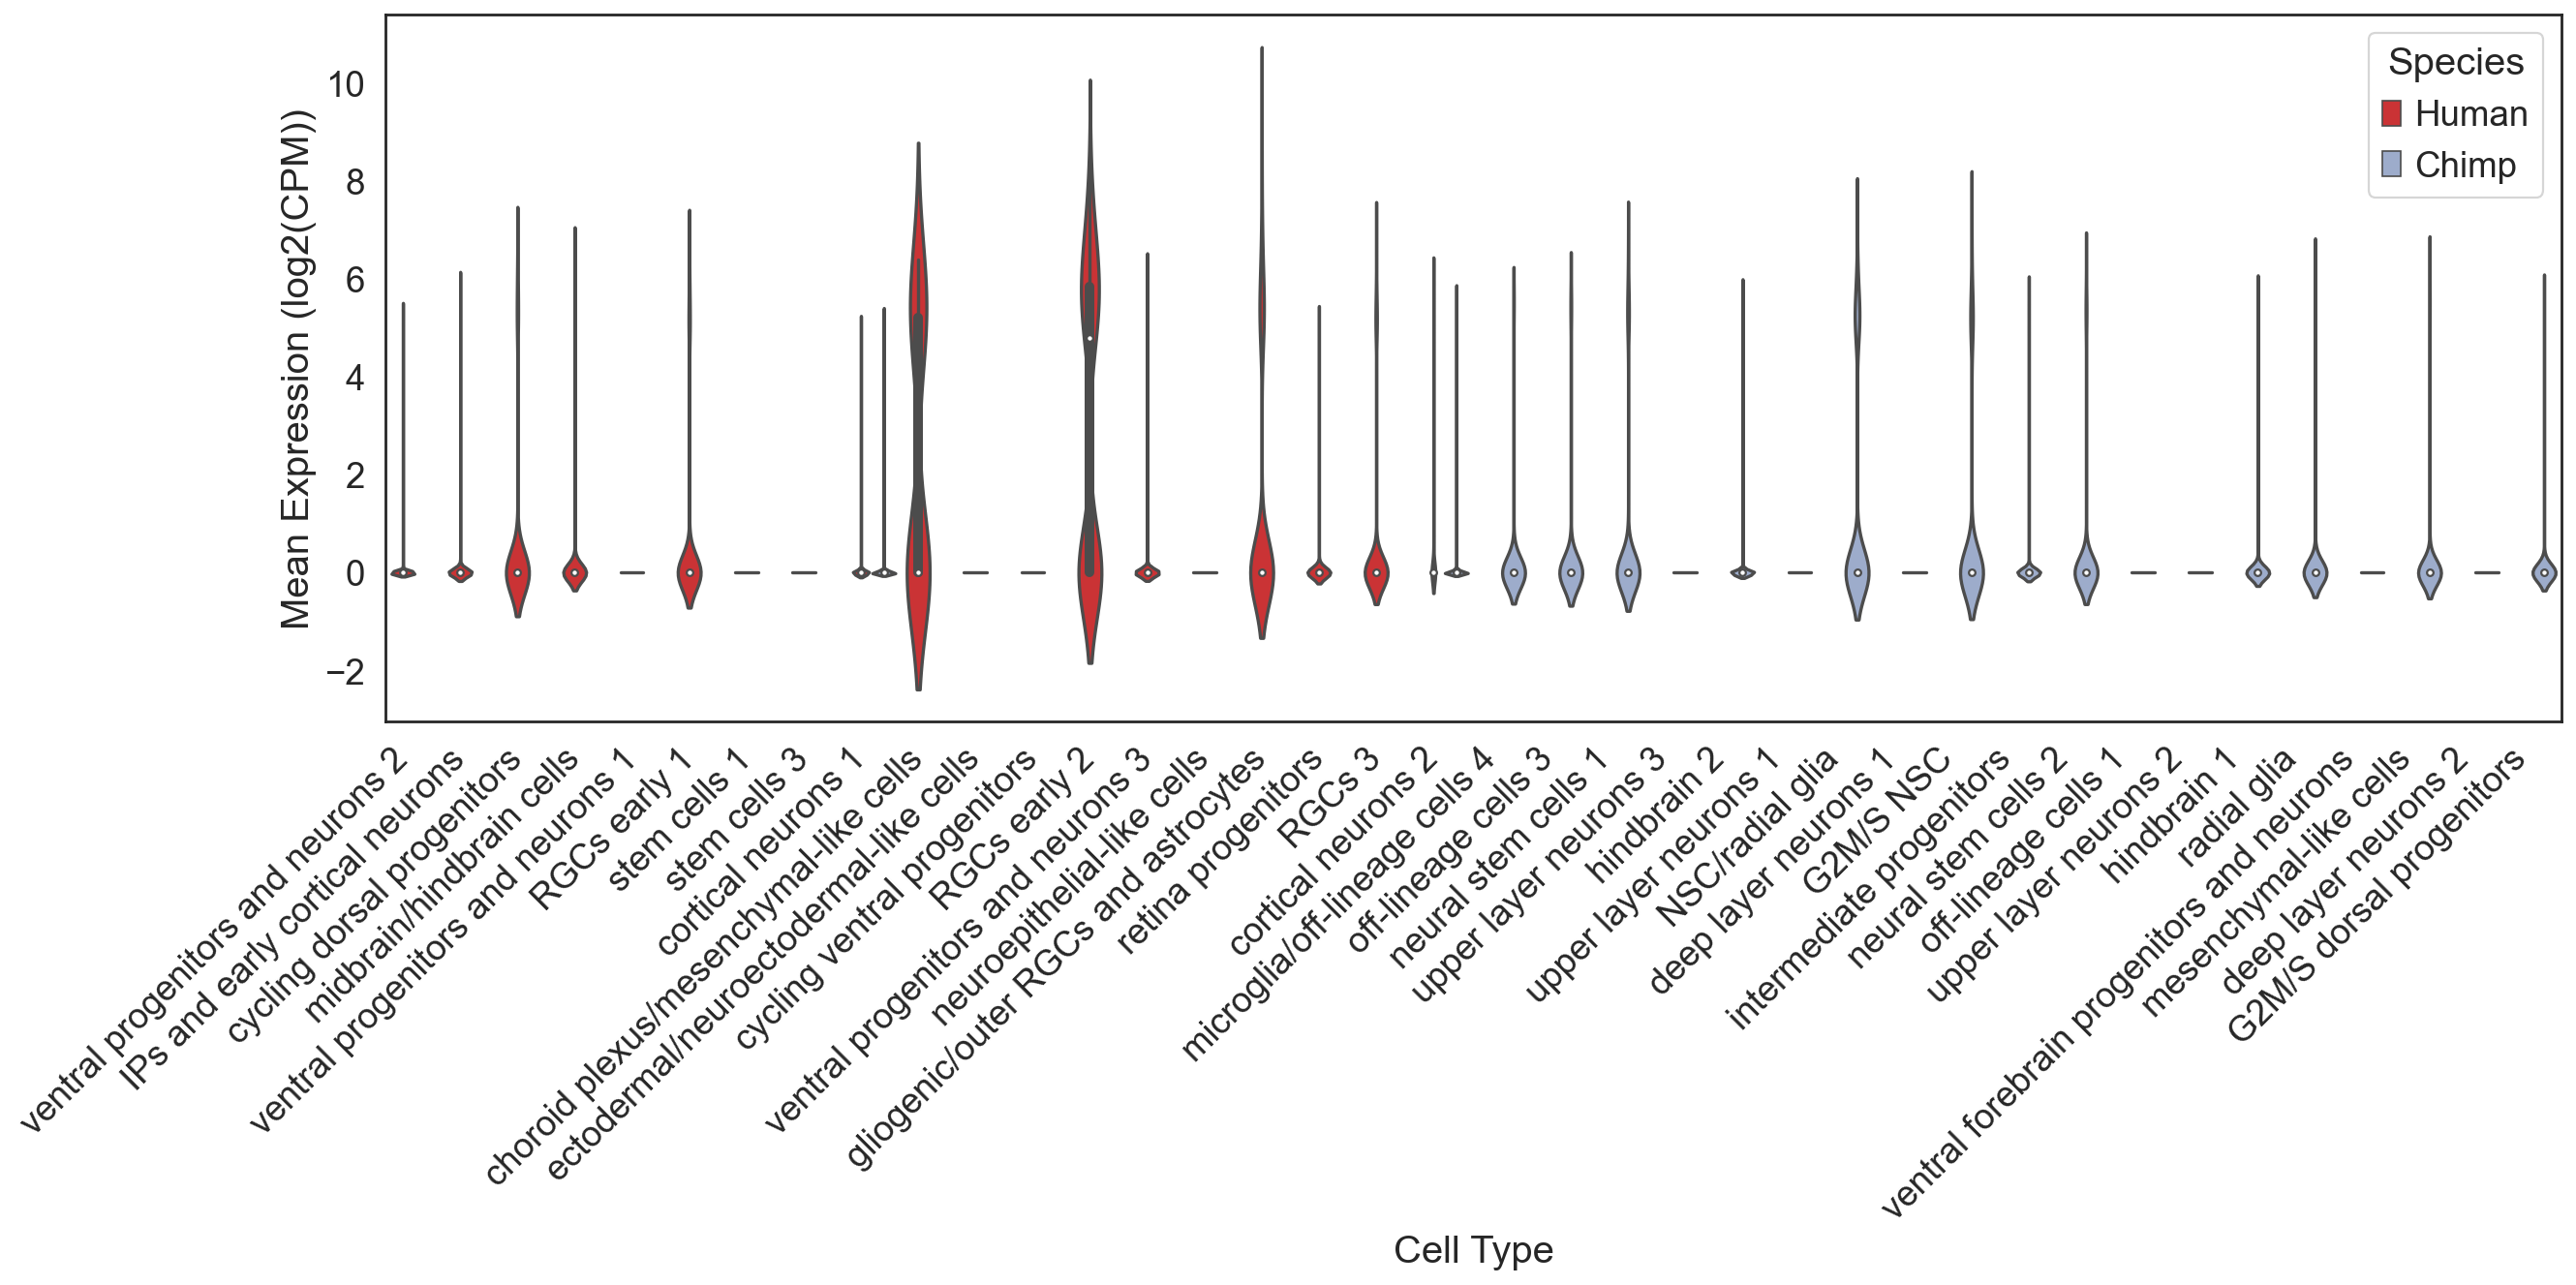

In [30]:
#Swarm plot of mean expression
import matplotlib.pyplot as plt
#pvalue < 1e-16 in all cases
fig, ax = plt.subplots(figsize=(18,6))
df = pd.DataFrame(out_cell)
df.columns = ["Cell Type", "Mean Expression (log2(CPM))", "Species"]
sns.violinplot(data = df, x = "Cell Type", y = "Mean Expression (log2(CPM))", hue = "Species", palette = palette)
plt.xticks(rotation=45, ha = "right")

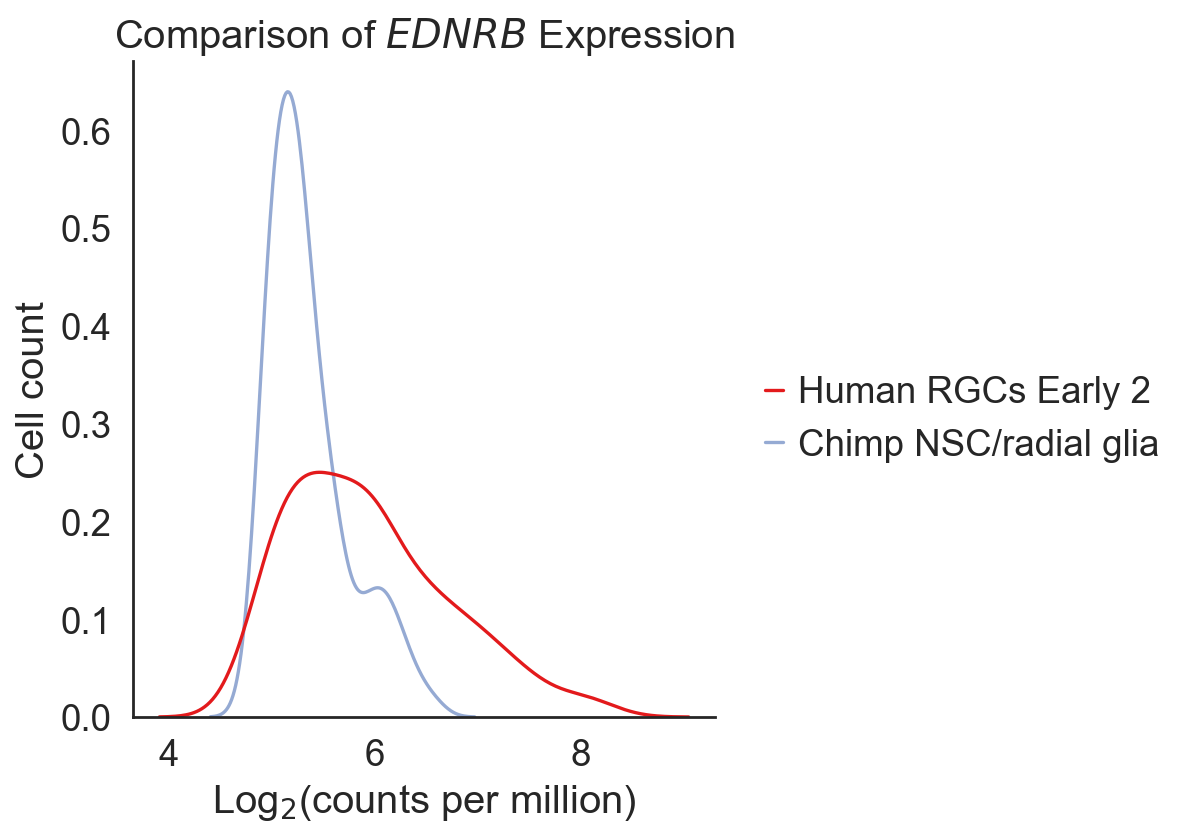

In [23]:
"""poisson.test(c(193, 378), c(383, 1873))

   Comparison of Poisson rates

data:  c(193, 378) time base: c(383, 1873)
count1 = 193, expected count1 = 96.938, p-value
< 2.2e-16
alternative hypothesis: true rate ratio is not equal to 1
95 percent confidence interval:
 2.088419 2.977506
sample estimates:
rate ratio 
  2.496919 """

hum_nonz = []
for i in c_ednrb_hum_l:
    if i:
        hum_nonz.append(i)

chp_nonz = []
for i in d["NSC/radial glia"]:
    if i:
        chp_nonz.append(i)

downsample = np.random.choice(chp_nonz, size = len(hum_nonz), replace = False)
#sns.displot({"Human RGCs Early 2":hum_nonz, "Chimp NSC/radial glia":chp_nonz}, palette = {"Human RGCs Early 2":"#E31A1C", "Chimp NSC/radial glia":"#95AAD3"})
sns.displot({"Human RGCs Early 2":hum_nonz, "Chimp NSC/radial glia":downsample}, palette = {"Human RGCs Early 2":"#E31A1C", "Chimp NSC/radial glia":"#95AAD3"}, kind = "kde").set(title = "Comparison of $\it{EDNRB}$ Expression", xlabel = "Log$_{2}$(counts per million)", ylabel = "Cell count")


In [61]:
d_hum = {}
j = 0
for i in list(set(hum_EDNRB.obs["cl_FullLineage"])):
    hum_rg = hum_EDNRB[hum_EDNRB.obs["cl_FullLineage"].isin([i])]
    z_hum = pd.DataFrame(hum_rg.X.toarray())
    z_hum.columns = hum_rg.var["Gene"]
    z_hum.index = hum_rg.obs
    c_ednrb_hum_l = []
    tot = 0
    c = 0

    for index, row in z_hum.iterrows():
        tot += 1
        c_ednrb_hum_l.append(row[5])
        if row[5] > 0:
            c += 1
    print(tot, c)
    if c > 100:
        print(i)
    if j:
        print(True)
        d_hum[i] = c_ednrb_hum_l
    j += 1

32655 789
nan
807 0
True
8 0
True
2218 51
True
30 0
True
1234 102
RGCs early 1
True
64 28
True
4299 28
True
548 114
gliogenic/outer RGCs and astrocytes
True
1 0
True
2 0
True
1930 158
RGCs 3
True
1772 2
True
383 193
RGCs early 2
True
1196 5
True
397 2
True
808 1
True
272 0
True
373 28
True
801 18
True


In [62]:
import seaborn as sns
palette = {"chimp":"#FB9A99",
           "human":"#E31A1C",
          "Chimp":"#FB9A99",
           "Human":"#E31A1C",
          "Orangutan":"#FF7F00",
          "orangutan":"#FF7F00",
          "Gorilla":"black",
          "gorilla":"black",
          "Rhesus":"#B15928",
          "rhesus":"#B15928",
          "HumChp":"#FB9A99",
          "HumOrg":"#FF7F00",
          "HumRhe":"#B15928"}
sns.set(font_scale = 1.5)
from scipy.stats import mannwhitneyu
tp = []
for i in d.keys():
    if np.mean(d[i]) > 0.05:
        tp.append([np.mean(d[i]), i, "Chimp"])
        
for i in d_hum.keys():
    if np.mean(d_hum[i]) > 0.05:
        tp.append([np.mean(d_hum[i]), i, "Human"])
df = pd.DataFrame(tp)
df.columns = ["Mean Expression (log2(CPM))", "Lineage", "Species"]
print(df)


    Mean Expression (log2(CPM))                                Lineage Species
0                      0.651508                              G2M/S NSC   Chimp
1                      0.495787                    neural stem cells 1   Chimp
2                      0.135186                 mesenchymal-like cells   Chimp
3                      0.058113               G2M/S dorsal progenitors   Chimp
4                      0.050334                            hindbrain 1   Chimp
5                      1.082848                        NSC/radial glia   Chimp
6                      0.282011                    neural stem cells 2   Chimp
7                      0.213814                    off-lineage cells 3   Chimp
8                      0.225234                            radial glia   Chimp
9                      0.113868          microglia/off-lineage cells 4   Chimp
10                     0.129093               midbrain/hindbrain cells   Human
11                     0.442629                     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'G2M/S NSC'),
  Text(1, 0, 'neural stem cells 1'),
  Text(2, 0, 'mesenchymal-like cells'),
  Text(3, 0, 'G2M/S dorsal progenitors'),
  Text(4, 0, 'hindbrain 1'),
  Text(5, 0, 'NSC/radial glia'),
  Text(6, 0, 'neural stem cells 2'),
  Text(7, 0, 'off-lineage cells 3'),
  Text(8, 0, 'radial glia'),
  Text(9, 0, 'microglia/off-lineage cells 4'),
  Text(10, 0, 'midbrain/hindbrain cells'),
  Text(11, 0, 'RGCs early 1'),
  Text(12, 0, 'choroid plexus/mesenchymal-like cells'),
  Text(13, 0, 'gliogenic/outer RGCs and astrocytes'),
  Text(14, 0, 'RGCs 3'),
  Text(15, 0, 'RGCs early 2'),
  Text(16, 0, 'cycling dorsal progenitors'),
  Text(17, 0, 'cortical neurons 2')])

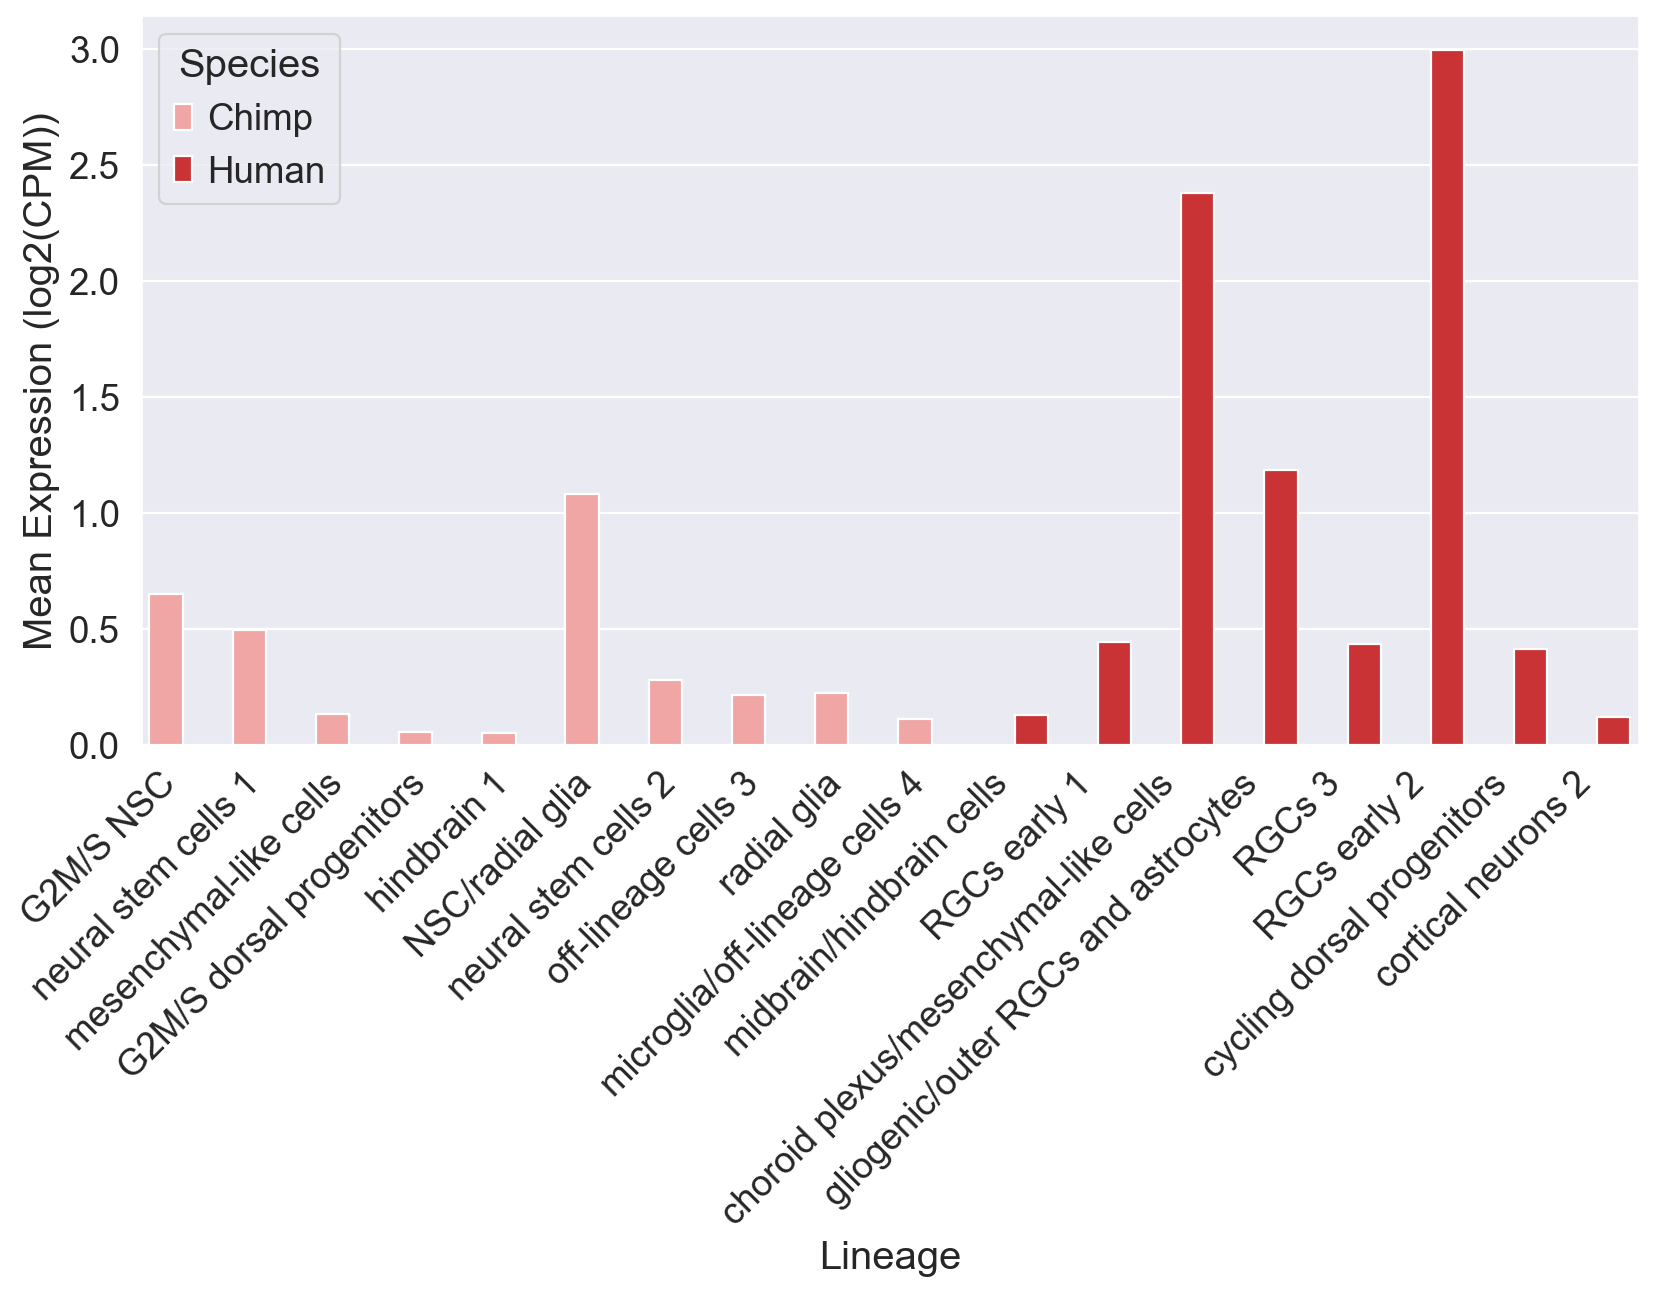

In [63]:
import matplotlib.pyplot as plt
#pvalue < 1e-16 in all cases
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(data = df, x = "Lineage", y = "Mean Expression (log2(CPM))", hue = "Species", palette = palette)
plt.xticks(rotation=45, ha = "right")

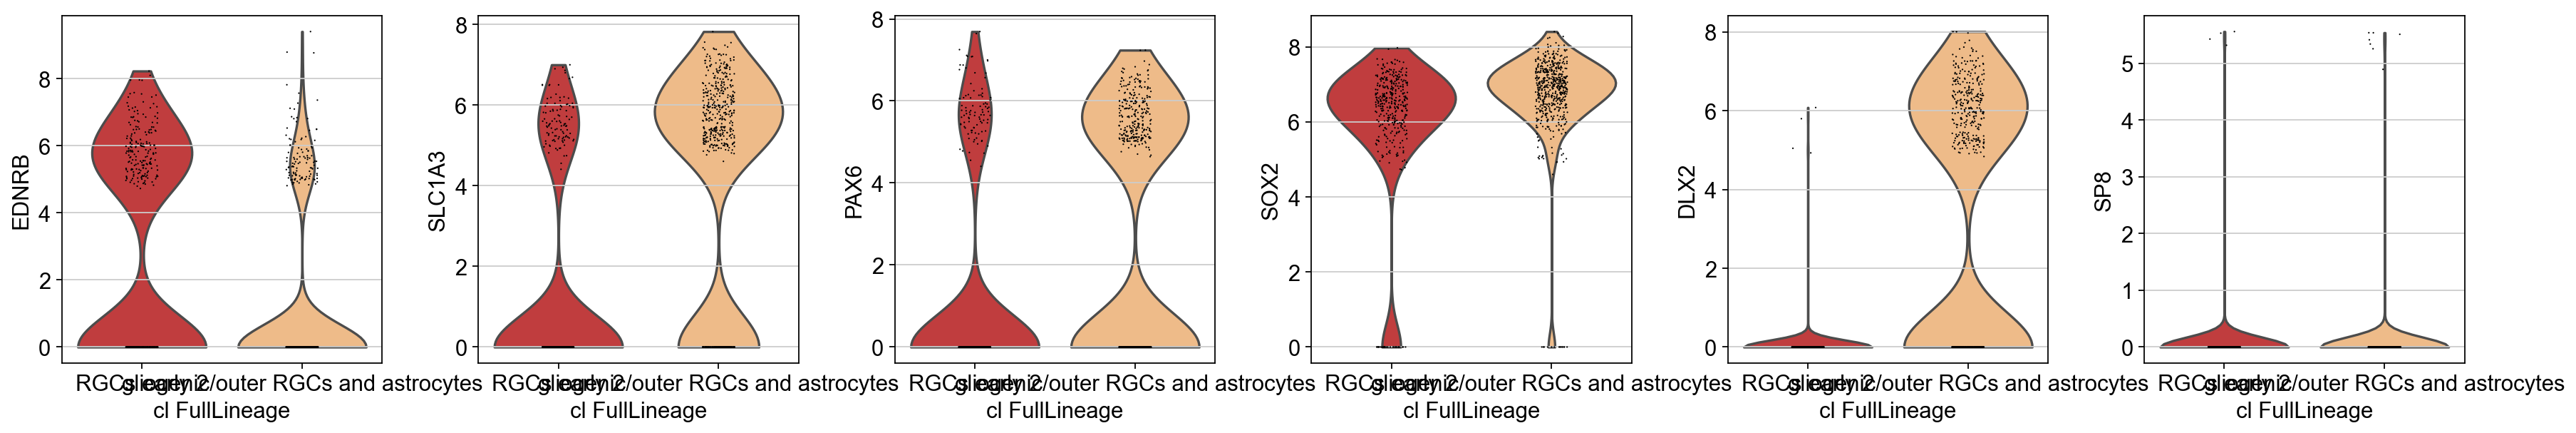

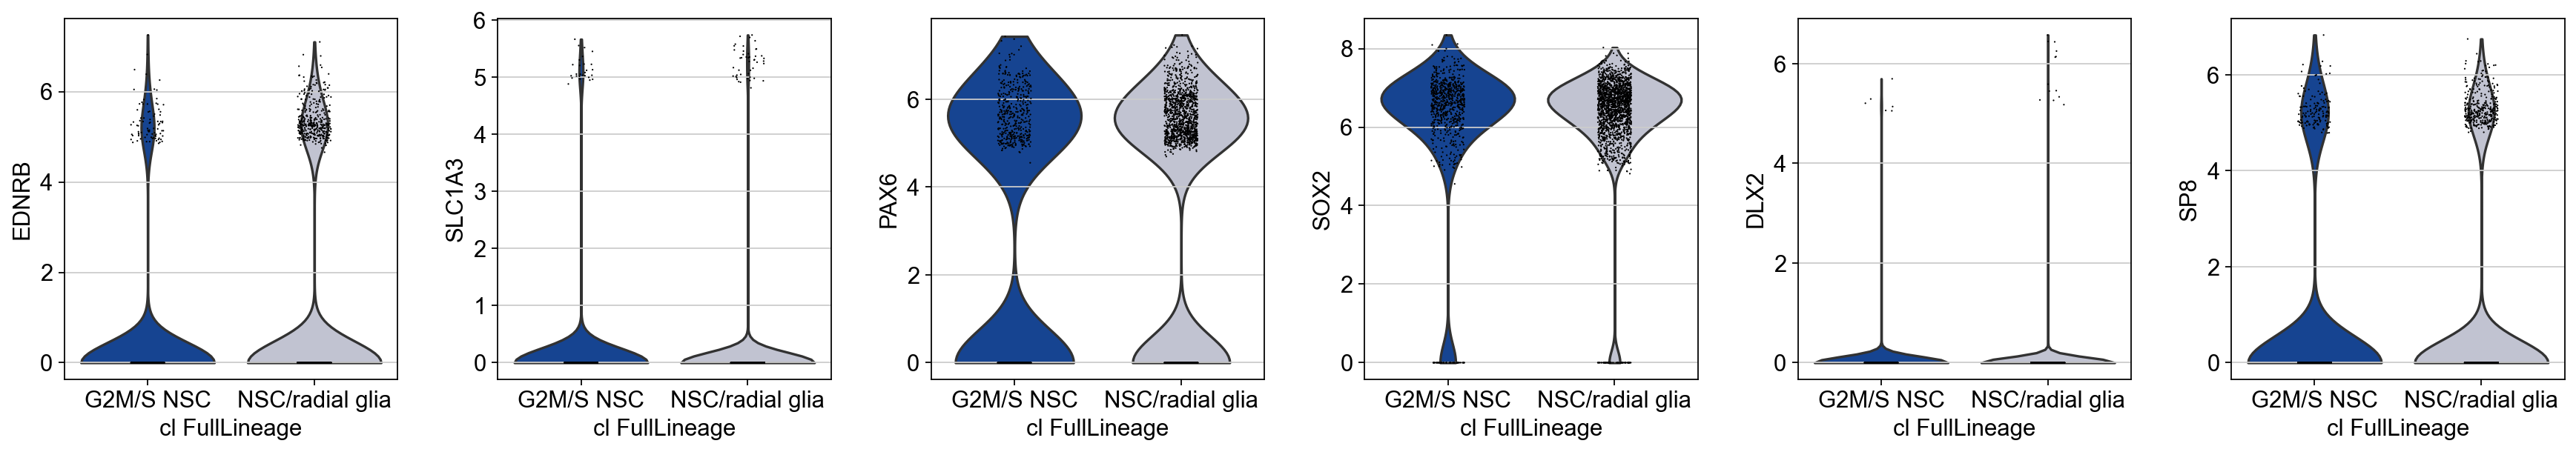

In [112]:
from matplotlib import pyplot as plt
hum_EDNRB2 = hum_counts[hum_counts.obs["cl_FullLineage"].isin(["RGCs early 2", "gliogenic/outer RGCs and astrocytes"])]
chp_EDNRB2 = l[l.obs["cl_FullLineage"].isin(["NSC/radial glia", "G2M/S NSC"])]
ax1 = sc.pl.violin(hum_EDNRB2, keys = ["EDNRB", "SLC1A3", "PAX6", "SOX2", "DLX2", "SP8"], groupby = "cl_FullLineage")
ax2 = sc.pl.violin(chp_EDNRB2, keys = ["EDNRB", "SLC1A3", "PAX6", "SOX2", "DLX2", "SP8"], groupby = "cl_FullLineage")

In [53]:
z_hum = pd.DataFrame(hum_rg.X.toarray())
z_hum.columns = hum_rg.var
z_hum.index = hum_rg.obs
c_ednrb_hum_l = []
for index, row in z_hum.iterrows():
    if row[7] > 0:
        c_ednrb_hum_l.append(row[7])
print(len(c_ednrb_hum_l))

114


In [110]:
import seaborn as sns
import numpy as np
#sns.displot({"Human EDNRB":c_ednrb_hum_l, "Chimp EDNRB":c_ednrb_chp_l}, log_scale = (False, 10))
from scipy.stats import ttest_ind
print(ttest_ind(c_ednrb_hum_l, c_ednrb_chp_l, alternative = "greater"))

Ttest_indResult(statistic=1.9371886856446352, pvalue=0.02655600781992138)


filtered out 7065 genes that are detected in less than 3 cells
filtered out 7386 genes that are detected in less than 3 cells


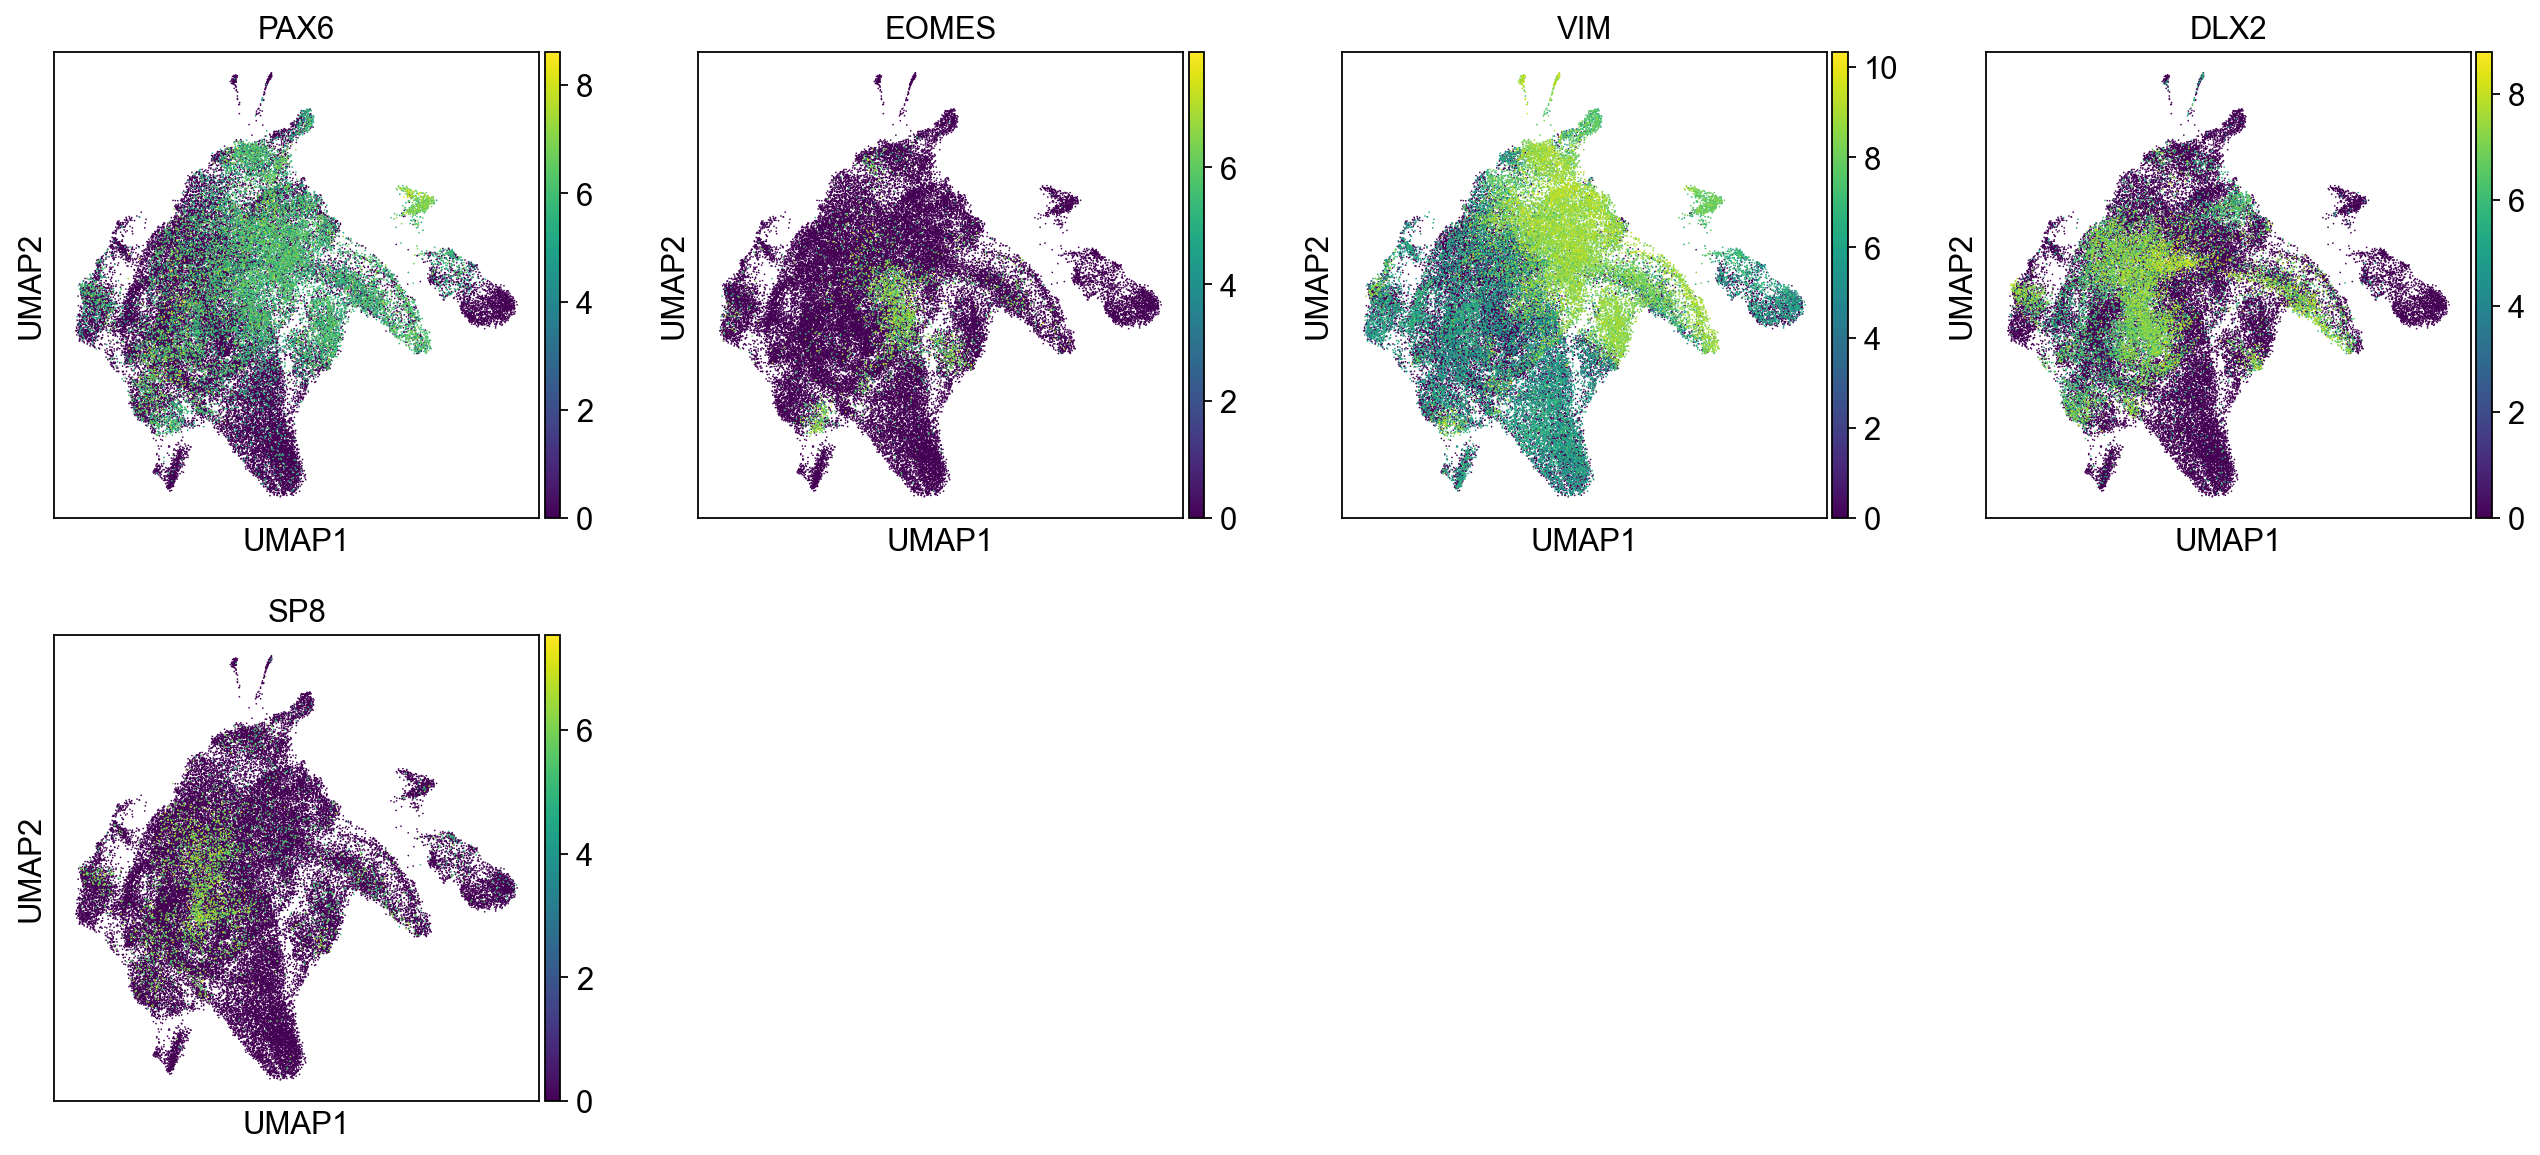

In [30]:
sc.pl.umap(hum_counts, color=['PAX6', 'EOMES', 'VIM', 'DLX2', 'SP8'])

In [33]:
sc.tl.leiden(hum_counts, resolution = 0.7)
sc.tl.leiden(l, resolution = 0.7)

running Leiden clustering
    finished: found 28 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:09)
running Leiden clustering
    finished: found 30 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:02)


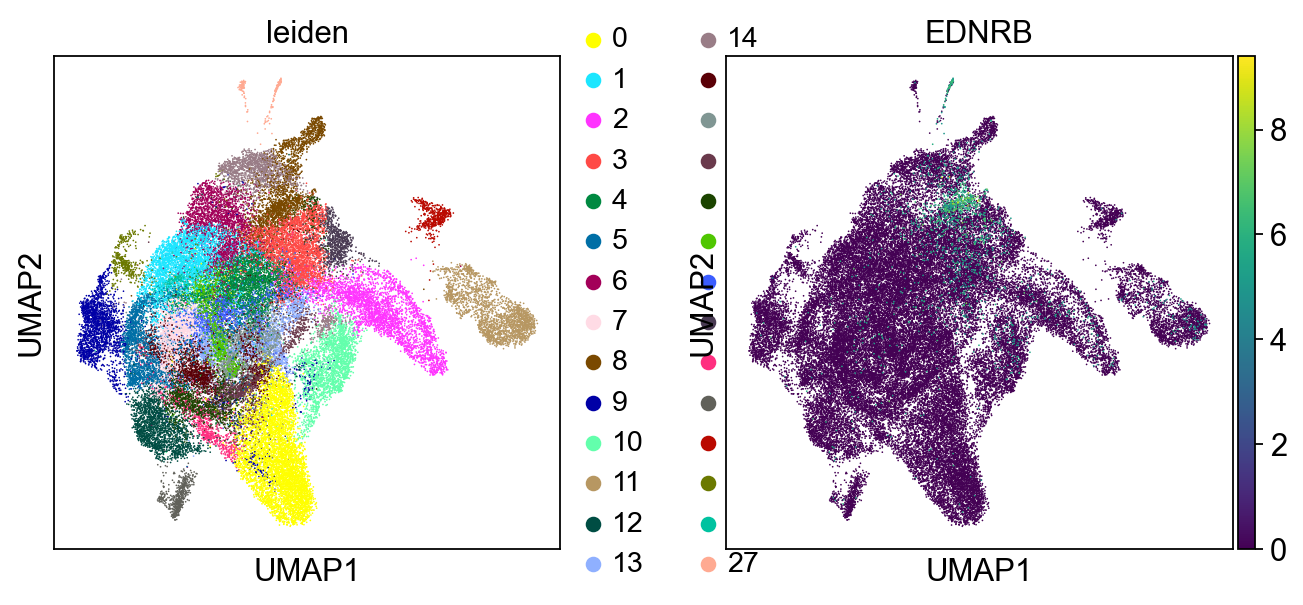

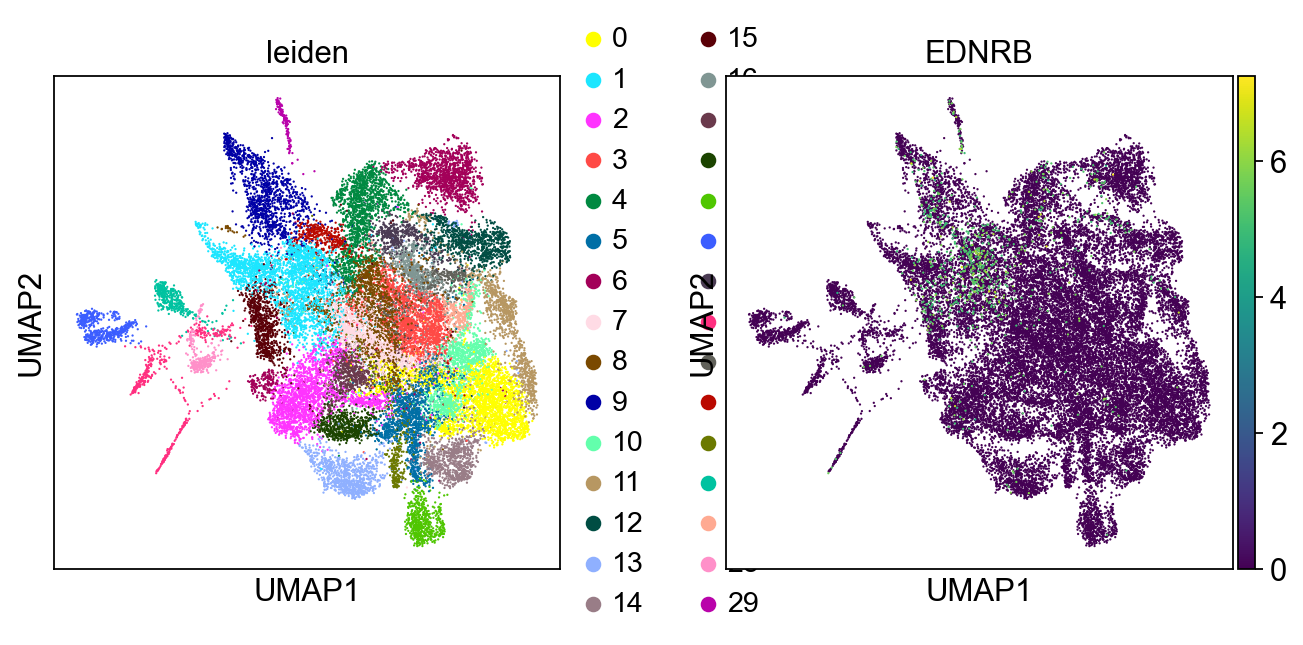

In [48]:
sc.pl.umap(hum_counts, color=['leiden', 'EDNRB'])
sc.pl.umap(l, color=['leiden', 'EDNRB'])

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:09)


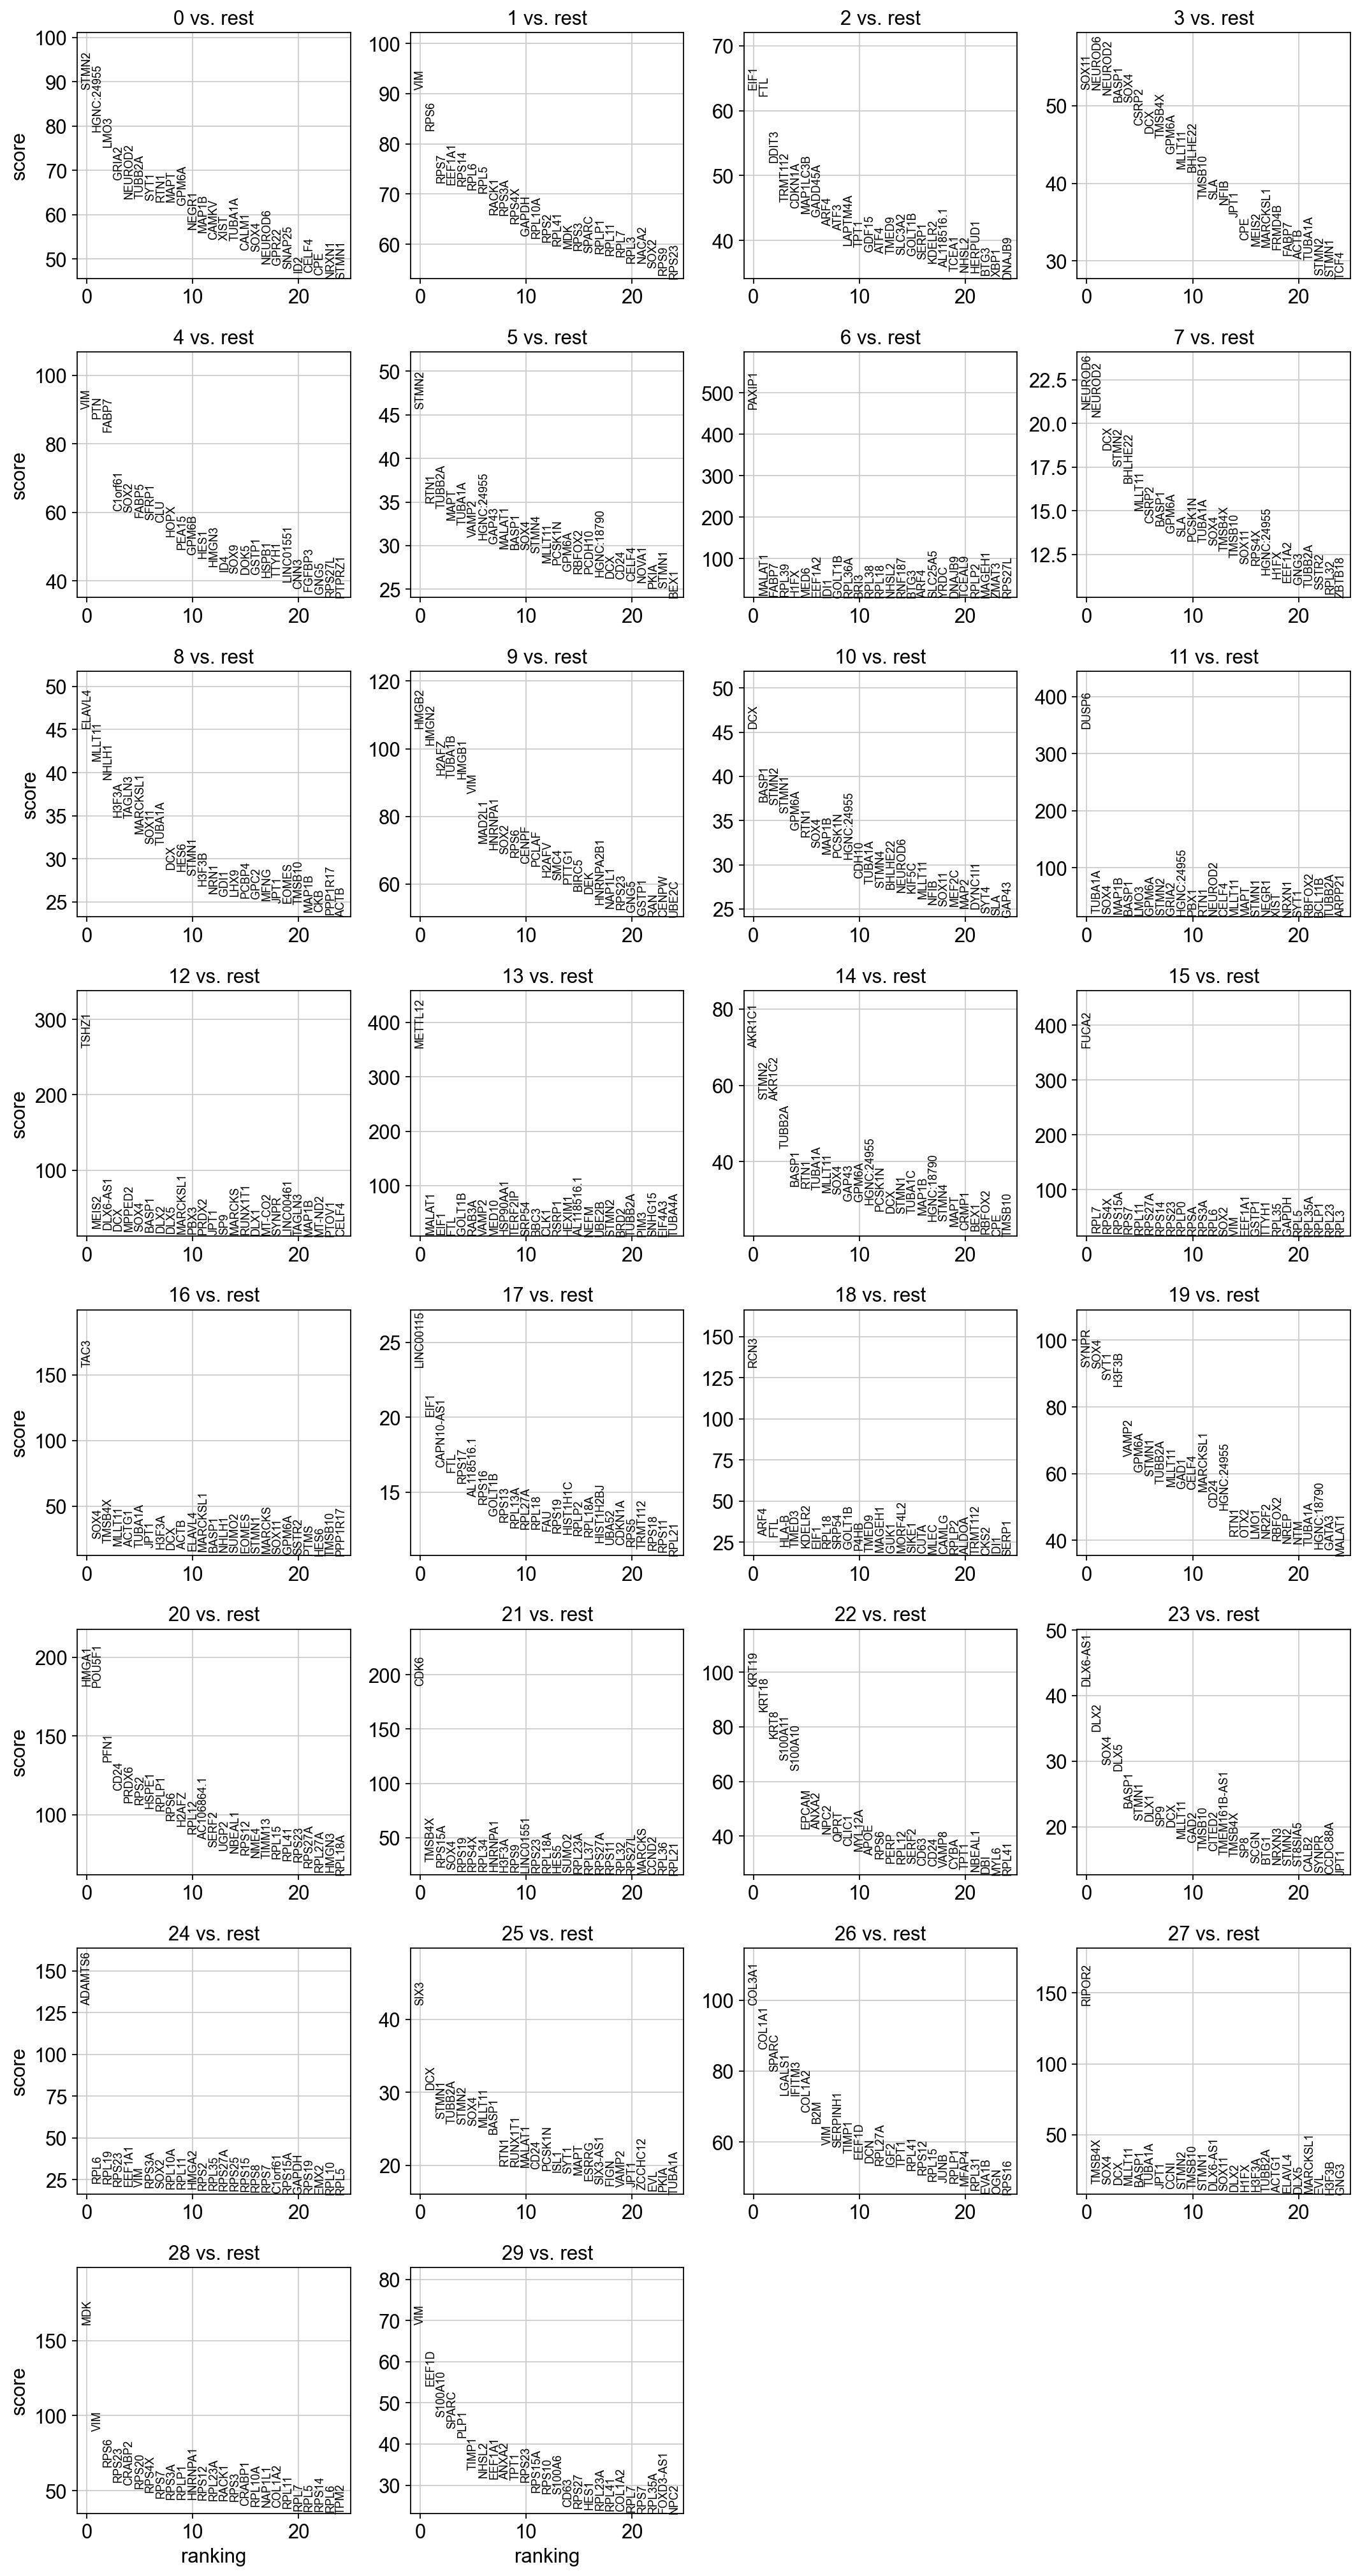

In [50]:
sc.tl.rank_genes_groups(l, 'leiden', method='t-test')
sc.pl.rank_genes_groups(l, n_genes=25, sharey=False)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:19)


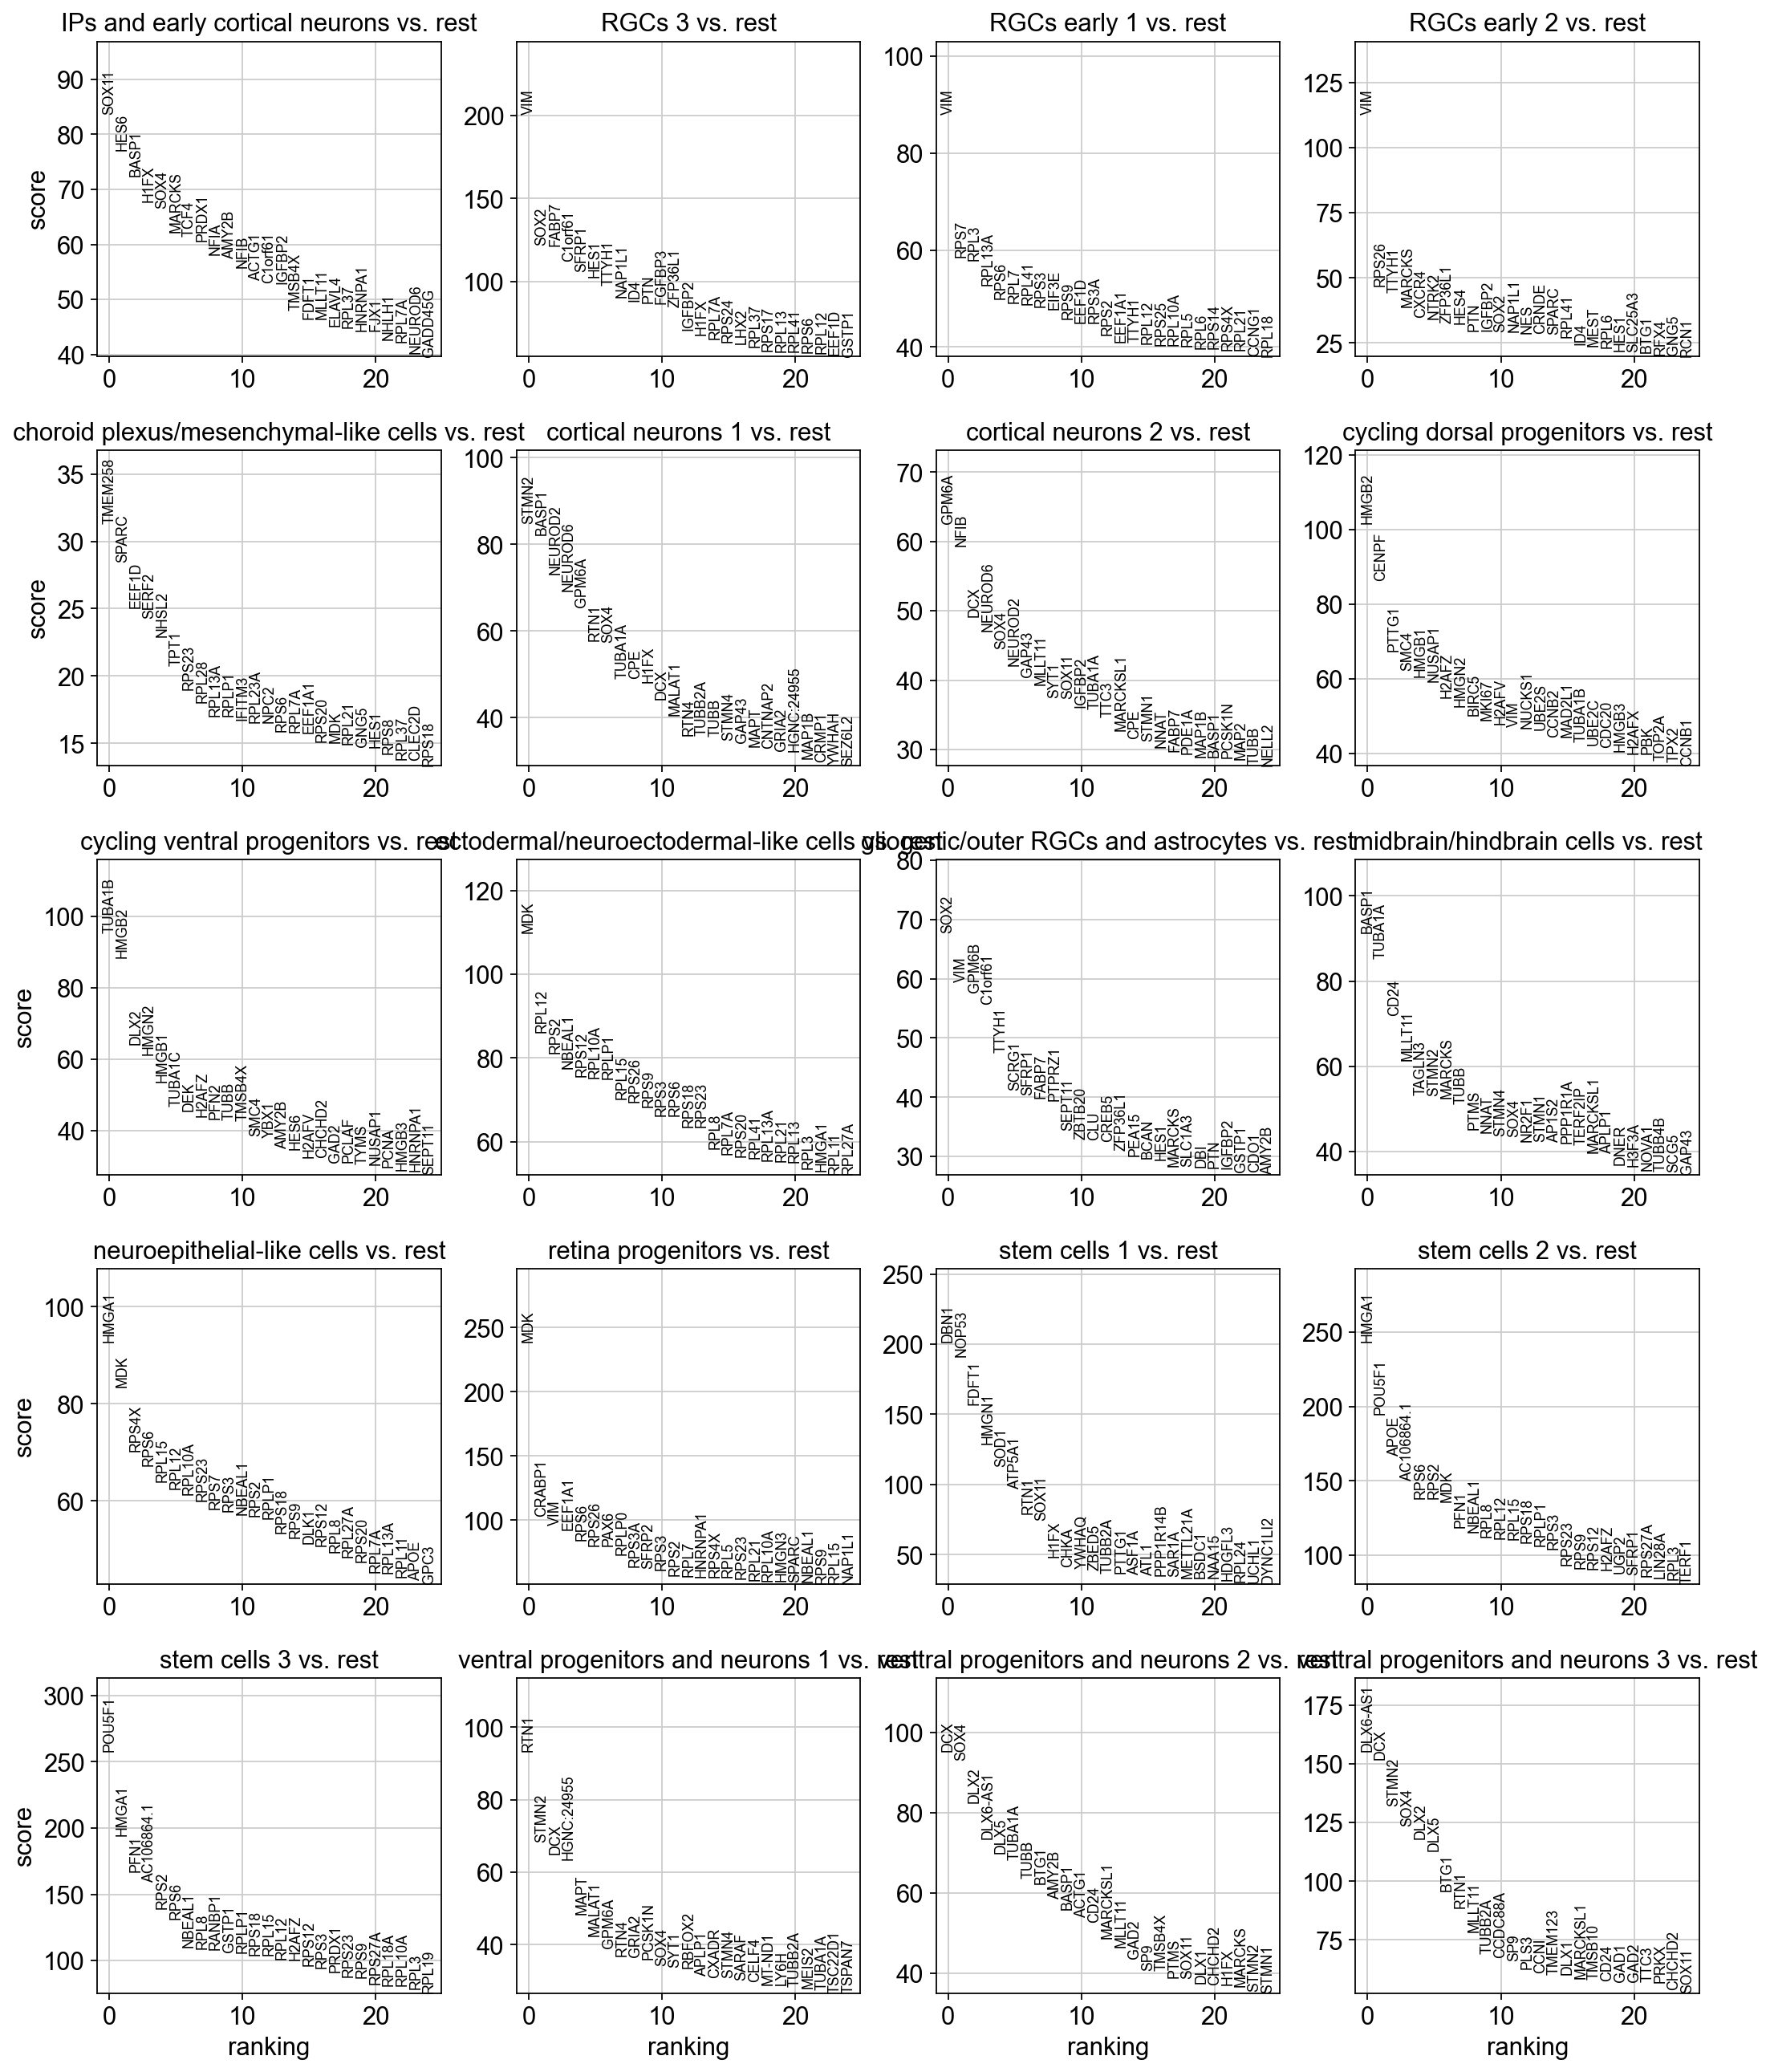

In [180]:
sc.tl.rank_genes_groups(hum_counts, 'cl_FullLineage', method='t-test')
sc.pl.rank_genes_groups(hum_counts, n_genes=25, sharey=False)

In [ ]:
chp_EDNRB = l[:, l.var["Gene"].isin(["EDNRB", "EDN1", "PAX6", "DLX2", "SCGN", "SP8", "CUX1", "NR2F2", "PTGDS"])]
#chp_EDNRB = chp_EDNRB[chp_EDNRB.obs['cl_FullLineage'].isin(['ventral forebrain progenitors and neurons'])]
#print(chp_EDNRB)
z_chp = pd.DataFrame(chp_EDNRB.X.toarray())
z_chp.columns = chp_EDNRB.var
z_chp.index = chp_EDNRB.obs
c_sp8_dlx2_ednrb = 0
c_sp8_dlx2_ednrb_ptgds = 0
c_sp8_dlx2_nr2f2_ednrb = 0
c_sp8_dlx2_nr2f2_ednrb_ptgds = 0
c_sp8_ednrb = 0
c_sp8_ednrb_ptgds = 0
c_sp8 = 0
c_sp8_dlx2 = 0
c_sp8_dlx2_nr2f2 = 0
c_dlx2_ednrb_ptgds = 0
c_dlx2 = 0
c_nr2f2 = 0
c_nr2f2_ednrb_ptgds = 0
for index, row in z_chp.iterrows():
    if row[0] > 0 and row[7] > 0 and row[3] > 0:
        c_sp8_dlx2_ednrb += 1
    if row[0] > 0 and row[7] > 0 and row[3] > 0 and row[8] > 0:
        c_sp8_dlx2_nr2f2_ednrb += 1
    if row[0] > 0 and row[7] > 0 and row[3] > 0 and row[5] > 0:
        c_sp8_dlx2_ednrb_ptgds += 1
    if row[0] > 0 and row[7] > 0 and row[3] > 0 and row[8] > 0 and row[5] > 0:
        c_sp8_dlx2_nr2f2_ednrb_ptgds += 1
    if row[7] > 0 and row[3] > 0:
        c_sp8_ednrb += 1
    if row[7] > 0 and row[3] > 0 and row[5] > 0:
        c_sp8_ednrb_ptgds += 1
    if row[0] > 0 and row[3] > 0:
        c_sp8_dlx2 += 1
    if row[3] > 0:
        c_sp8 += 1
    if row[3] > 0 and row[0] > 0 and row[8] > 0:
        c_sp8_dlx2_nr2f2 += 1
    if row[0] > 0:
        c_dlx2 += 1
    if row[0] > 0 and row[5] > 0  and row[7] > 0:
        c_dlx2_ednrb_ptgds += 1
    if row[8] > 0:
        c_nr2f2 += 1
    if row[8] > 0 and row[7] > 0 and row[5] > 0:
        c_nr2f2_ednrb_ptgds += 1
print("Number of SP8+ DLX2+ EDNRB+ Chimp Cells", c_sp8_dlx2_ednrb, "out of", c_sp8_dlx2)
print("Number of SP8+ DLX2+ EDNRB+ NR2F2+ Chimp Cells", c_sp8_dlx2_nr2f2_ednrb, "out of", c_sp8_dlx2_nr2f2)
print("Number of SP8+ DLX2+ EDNRB+ PTGDS+ Chimp Cells", c_sp8_dlx2_ednrb_ptgds, "out of", c_sp8_dlx2)
print("Number of SP8+ DLX2+ EDNRB+ NR2F2+ PTGDS+ Chimp Cells", c_sp8_dlx2_nr2f2_ednrb_ptgds, "out of", c_sp8_dlx2_nr2f2)
print("Number of SP8+ EDNRB+ Human Cells", c_sp8_ednrb, "out of", c_sp8)
print("Number of SP8+ EDNRB+ PTGDS+ Chimp Cells", c_sp8_ednrb_ptgds, "out of", c_sp8)
print("Number of DLX2+ EDNRB+ PTGDS+ Chimp Cells", c_dlx2_ednrb_ptgds, "out of", c_dlx2)
print("Number of NR2F2+ EDNRB+ PTGDS+ Chimp Cells", c_nr2f2_ednrb_ptgds, "out of", c_nr2f2)

#Need to do and plot differential expression for EDN1 (maybe?) and EDNRB for RG and astrocytes
#Need to see if RG closer to IPCs express more EDNRB in humans.
#Need to do DEG for CUX1 in EN/IN.
hum_EDNRB = hum_counts[:, hum_counts.var["Gene"].isin(["EDNRB", "EDN1", "PAX6", "DLX2", "SCGN", "SP8", "CUX1", "NR2F2", "PTGDS"])]
hum_EDNRB = hum_EDNRB[~hum_EDNRB.obs["Stage"].isin(["iPSCs", "EB", "Neuroectoderm", "Neuroepithelium"])]
#hum_EDNRB = hum_EDNRB[hum_EDNRB.obs["cl_FullLineage"].isin(['ventral progenitors and neurons 3', 'ventral progenitors and neurons 2', 'ventral progenitors and neurons 1', 'cycling ventral progenitors'])]
z_hum = pd.DataFrame(hum_EDNRB.X.toarray())
z_hum.columns = hum_EDNRB.var
z_hum.index = hum_EDNRB.obs
c_sp8_dlx2_ednrb = 0
c_sp8_dlx2_ednrb_ptgds = 0
c_sp8_dlx2_nr2f2_ednrb = 0
c_sp8_dlx2_nr2f2_ednrb_ptgds = 0
c_sp8_ednrb = 0
c_sp8_ednrb_ptgds = 0
c_sp8 = 0
c_sp8_dlx2 = 0
c_sp8_dlx2_nr2f2 = 0
c_dlx2_ednrb_ptgds = 0
c_dlx2 = 0
c_nr2f2 = 0
c_nr2f2_ednrb_ptgds = 0
for index, row in z_hum.iterrows():
    if row[0] > 0 and row[7] > 0 and row[3] > 0:
        c_sp8_dlx2_ednrb += 1
    if row[0] > 0 and row[7] > 0 and row[3] > 0 and row[8] > 0:
        c_sp8_dlx2_nr2f2_ednrb += 1
    if row[0] > 0 and row[7] > 0 and row[3] > 0 and row[5] > 0:
        c_sp8_dlx2_ednrb_ptgds += 1
    if row[0] > 0 and row[7] > 0 and row[3] > 0 and row[8] > 0 and row[5] > 0:
        c_sp8_dlx2_nr2f2_ednrb_ptgds += 1
    if row[7] > 0 and row[3] > 0:
        c_sp8_ednrb += 1
    if row[7] > 0 and row[3] > 0 and row[5] > 0:
        c_sp8_ednrb_ptgds += 1
    if row[0] > 0 and row[3] > 0:
        c_sp8_dlx2 += 1
    if row[3] > 0:
        c_sp8 += 1
    if row[3] > 0 and row[0] > 0 and row[8] > 0:
        c_sp8_dlx2_nr2f2 += 1
    if row[0] > 0:
        c_dlx2 += 1
    if row[0] > 0 and row[5] > 0  and row[7] > 0:
        c_dlx2_ednrb_ptgds += 1
    if row[8] > 0:
        c_nr2f2 += 1
    if row[8] > 0 and row[7] > 0 and row[5] > 0:
        c_nr2f2_ednrb_ptgds += 1
print("Number of SP8+ DLX2+ EDNRB+ Human Cells", c_sp8_dlx2_ednrb, "out of", c_sp8_dlx2)
print("Number of SP8+ DLX2+ EDNRB+ NR2F2+ Human Cells", c_sp8_dlx2_nr2f2_ednrb, "out of", c_sp8_dlx2_nr2f2)
print("Number of SP8+ DLX2+ EDNRB+ PTGDS+ Human Cells", c_sp8_dlx2_ednrb_ptgds, "out of", c_sp8_dlx2)
print("Number of SP8+ DLX2+ EDNRB+ NR2F2+ PTGDS+ Human Cells", c_sp8_dlx2_nr2f2_ednrb_ptgds, "out of", c_sp8_dlx2_nr2f2)
print("Number of SP8+ EDNRB+ Human Cells", c_sp8_ednrb, "out of", c_sp8)
print("Number of SP8+ EDNRB+ PTGDS+ Human Cells", c_sp8_ednrb_ptgds, "out of", c_sp8)
print("Number of DLX2+ EDNRB+ PTGDS+ Human Cells", c_dlx2_ednrb_ptgds, "out of", c_dlx2)
print("Number of NR2F2+ EDNRB+ PTGDS+ Human Cells", c_nr2f2_ednrb_ptgds, "out of", c_nr2f2)